In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [25]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['species']=lb.fit_transform(df['species'])

In [29]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X=df.drop('species',axis=1)
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
 y_train

96     1
105    2
66     1
0      0
122    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 100, dtype: int64

In [32]:
#scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

In [33]:
model = Sequential()

model.add(Dense(4,activation='relu',input_shape=(4,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1335 (5.21 KB)
Trainable params: 1335 (5.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 139ms/step - loss: 1.2167 - accuracy: 0.3000 - val_loss: 1.0383 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 1.1621 - accuracy: 0.3000 - val_loss: 1.0210 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1146 - accuracy: 0.3000 - val_loss: 1.0120 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0848 - accuracy: 0.3000 - val_loss: 1.0074 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0600 - accuracy: 0.3000 - val_loss: 1.0068 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0454 - accuracy: 0.3125 - val_loss: 1.0056 - val_accuracy: 0.6500
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 1.0291 - accuracy: 0.6000 - val_loss: 0.9993 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==

In [37]:
y_prob = model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [38]:
y_pred = y_prob.argmax(axis=1)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.98

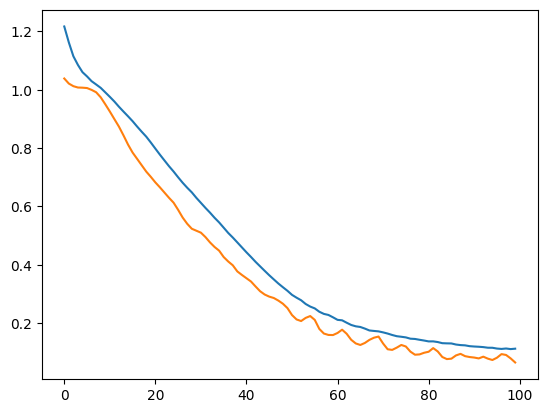

In [41]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

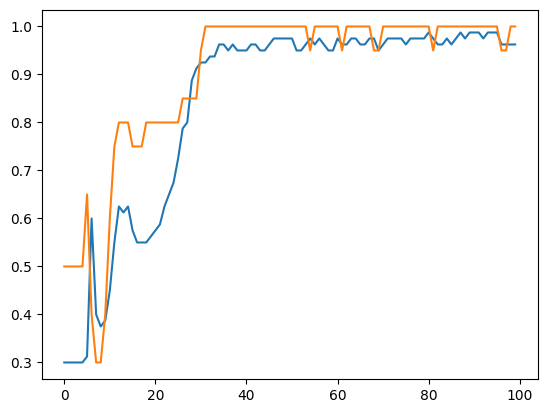

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])